In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset("with/prog.nc")
ini = xr.open_dataset("with/MOM_IC.nc")

In [3]:
ds['e'].mean(['xh','yh']).isel(zi=0)

<xarray.DataArray 'e' (Time: 29)>
array([  -86.4   ,  -172.8   ,  -259.2   ,  -345.6   ,  -432.    ,
        -518.4   ,  -604.8   ,  -691.2   ,  -777.6   ,  -864.    ,
        -950.4001, -1000.    , -1000.    , -1000.    , -1000.    ,
       -1000.    , -1000.    , -1000.    , -1000.    , -1000.    ,
       -1000.    , -1000.    , -1000.    , -1000.    , -1000.    ,
       -1000.    , -1000.    , -1000.    , -1000.    ], dtype=float32)
Coordinates:
  * Time     (Time) object 0001-01-02 00:00:00 ... 0001-01-30 00:00:00
    zi       float64 0.0

Initial depths: [[    0.          -181.81818182  -363.63636364  -545.45454545
   -727.27272727  -909.09090909 -1090.90909091 -1272.72727273
  -1454.54545455 -1636.36363636 -1818.18181818 -2000.        ]]
w_otec= <xarray.DataArray 'e' ()>
array(0.0002)
Coordinates:
    zi       float64 0.0


/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:359: CFWarning: this date/calendar/year zero convention is not supported by CF
  lower = cftime.num2date(vmin, self.date_unit, calendar=self.calendar)
/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:405: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(dt, self.date_unit, calendar=self.calendar)
/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:454: CFWarning: this date/calendar/year zero convention is not supported by CF
  return cftime.date2num(ticks, self.date_unit, calendar=self.calendar)
/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:228: CFWarning: this date/calendar/year zero convention is not supported by CF
  dt = cftime.num2date(x, self.time_units, calendar=self.calendar)


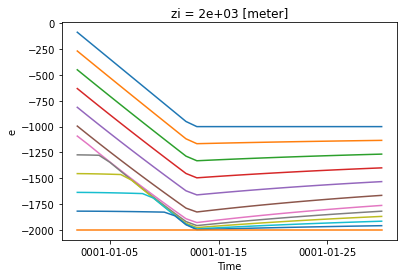

In [4]:
# Graph the depth of each layer over time
print('Initial depths:', ini['eta'].mean(['lath', 'lonh']).data)
e = ds['e'].mean(['yh', 'xh'])
for z in ds['zi']:
    e.sel(zi=z).plot()
    
# Reverse engineer the value of w_otec.
print('w_otec=', (e[0,0] - e[1,0])/(5*24*3600))

(2000.0, 0.0)

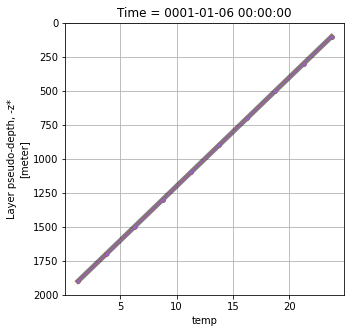

In [4]:


plt.figure(figsize=(5,5))

ini['Temp'].mean(['lath', 'lonh']).plot(y='Layer', color='k', lw=5., alpha=0.5)
for t in ds['Time']:
    ds['temp'].sel(Time=t).mean(['xh', 'yh']).plot(y='zl', marker=".")
plt.grid(True)
plt.ylim(2000, 0)